# Extract tissue arround nodules

In [1]:
import pylidc as pl
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd

In [ ]:
def _get_slice (middle_point, length):
    start = int(middle_point - (length/2))
    end = int(middle_point + (length/2))
    return slice(start, end, None)

def _get_bbox(new_centroid, desired_shape):
    x = new_centroid[0]
    y = new_centroid[1]
    z = new_centroid[2]
    xlength = desired_shape[0]
    ylength = desired_shape[1]
    zlength = desired_shape[2]
    
    slx = _get_slice(x, xlength)
    sly = _get_slice(y, ylength)
    slz = _get_slice(z, zlength)
    
    return (slx, sly, slz)

def get_surrounding_tissue_by_distance (scan, ann, radius, path_to_save, document, i, desired_shape=(64, 64, 28), resolution=10):
    a,b,c = ann.centroid
    a = int(a)
    b = int(b)
    c = int(c)
    PHI = np.arange(0.0, 2*np.pi, np.pi/resolution)
    ETA = np.arange(0.0, 2*np.pi, np.pi/resolution)

    ETA, PHI = np.repeat(ETA, PHI.shape[0]), np.tile(PHI, ETA.shape[0])

    X = a + radius * np.sin(ETA) * np.cos(PHI)
    Y = b + radius * np.sin(ETA) * np.sin(PHI)
    Z = c + radius * np.cos(ETA)

    voxel_grid = np.vstack((X,Y,Z))
    centers = voxel_grid.T
    volume_n = 0
    for new_center in centers:
        bbox = _get_bbox(new_center, desired_shape)
        try :
            vol = scan[bbox]
            if vol.shape != desired_shape:
                continue
        except :
            continue
        np.save(path_to_save + '/v' + str( (i*4*(resolution**2)) + volume_n), vol)
        document = document.append(pd.DataFrame([['v' + str( (i*4*(resolution**2)) + volume_n), ann.scan.patient_id, ann.malignancy, ann.centroid,
                                                new_center, radius, ann.diameter, ann.volume]], 
                                              columns= ["volume", "pid", "malginancy score", "nodule centroid",
                                                        "volume centroid", "radius", "N-diameter", "N-volume"]),
                                 ignore_index = True)
        volume_n += 1
    
    return document
        

#def get_surrounding_tissue_by_distance (scan, ann, radius, path_to_save, document, volume_n, desired_shape=(64, 64, 28), step = 1):
#    a,b,c = ann.centroid
#    a = int(a)
#    b = int(b)
#    c = int(c)
#    print([a,b,c])
#    for x in range(a, radius+a, step):
#        for y in range(b, radius+b):
#            print('x = ', x-a)
#            print('y = ', y-b)
#            z = np.sqrt( (radius**2) - ((x-a)**2) - ((y-b)**2) ) + c
#           z = int(z)
#           print('z = ', z-c)
#           new_centroid = [x, y, z]
#           bbox = _get_bbox(new_centroid, desired_shape)
#           try :
#               vol = scan[bbox]
#            except :
#                continue
#            np.save(path_to_save + '/v' + str(volume_n), vol)
#            document = document.append(pd.DataFrame([['v' + str(volume_n), ann.scan.patient_id, ann.malignancy, ann.centroid,
#                                                    new_centroid, radius]], 
#                                                  columns= ["volume", "pid", "malginancy score", "nodule centroid",
#                                                            "volume centroid", "radius"]),
#                                     ignore_index = True)
#            volume_n += 1

In [10]:
#_range = range(1, 6)
_range = [1, 5]
anns_five_levels = [pl.query(pl.Annotation).join(pl.Scan).filter(pl.Annotation.malignancy == i, 
                                                        pl.Scan.slice_thickness >= 1.2,
                                                        pl.Scan.slice_thickness <= 1.3) for i in _range]
for i, ann in enumerate(anns_five_levels):
    print('Malignancy level %d count =' % (i+1), ann.count())

Malignancy level 1 count = 335
Malignancy level 2 count = 208


Loading dicom files ... This may take a moment.
[247.72505892 374.61586803 189.93637078]


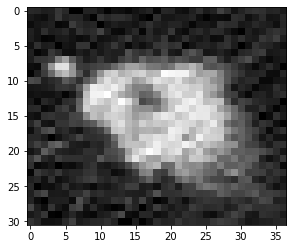

In [4]:
ann = anns_five_levels[4][150]
vol = ann.scan.to_volume()
print(ann.centroid)
bbox = ann.bbox(pad=None)
plt.imshow(vol[bbox][:,:,6], cmap=plt.cm.gray)

In [11]:
document = pd.DataFrame({"volume":[], "pid":[], "malginancy score":[], "nodule centroid": []
                         , "volume centroid":[], "radius":[], "N-diameter": [], "N-volume" : []})

In [12]:
def ifnotexistmake(path_to_save):
    if not os.path.exists(path_to_save):
        os.makedirs(path_to_save)

In [13]:
radius_1 = 5 # in pixels
radius_2 = 10 # in pixels
radius_3 = 15 # in pixels
radius_4 = 20 # in pixels
radius_5 = 25 # in pixels
radius_6 = 30 # in pixels
radius_7 = 35 # in pixels
radius_8 = 40 # in pixels
radius_9 = 45 # in pixels
radius_10 = 50 # in pixels

# Create data folders
for level_number, anns in enumerate(anns_five_levels, 1):
    if level_number == 1:
        _level_num = level_number
    else :
        _level_num = 5
    path_to_save_1 = './sameslicethickness/different_distances/size_encoded/radius_'+str(radius_1)+'/level_' + str(_level_num) + '/volumes'
    path_to_save_2 = './sameslicethickness/different_distances/size_encoded/radius_'+str(radius_2)+'/level_' + str(_level_num) + '/volumes'
    path_to_save_3 = './sameslicethickness/different_distances/size_encoded/radius_'+str(radius_3)+'/level_' + str(_level_num) + '/volumes'
    path_to_save_4 = './sameslicethickness/different_distances/size_encoded/radius_'+str(radius_4)+'/level_' + str(_level_num) + '/volumes'
    path_to_save_5 = './sameslicethickness/different_distances/size_encoded/radius_'+str(radius_5)+'/level_' + str(_level_num) + '/volumes'
    path_to_save_6 = './sameslicethickness/different_distances/size_encoded/radius_'+str(radius_6)+'/level_' + str(_level_num) + '/volumes'
    path_to_save_7 = './sameslicethickness/different_distances/size_encoded/radius_'+str(radius_7)+'/level_' + str(_level_num) + '/volumes'
    path_to_save_8 = './sameslicethickness/different_distances/size_encoded/radius_'+str(radius_8)+'/level_' + str(_level_num) + '/volumes'
    path_to_save_9 = './sameslicethickness/different_distances/size_encoded/radius_'+str(radius_9)+'/level_' + str(_level_num) + '/volumes'
    path_to_save_10 = './sameslicethickness/different_distances/size_encoded/radius_'+str(radius_10)+'/level_' + str(_level_num) + '/volumes'
    
    ifnotexistmake(path_to_save_1)
    ifnotexistmake(path_to_save_2)
    ifnotexistmake(path_to_save_3)
    ifnotexistmake(path_to_save_4)
    ifnotexistmake(path_to_save_5)
    ifnotexistmake(path_to_save_6)
    ifnotexistmake(path_to_save_7)
    ifnotexistmake(path_to_save_8)
    ifnotexistmake(path_to_save_9)
    ifnotexistmake(path_to_save_10)

    for i in tqdm(range(anns.count())):
        ann = anns[i]
        try:
            scan = ann.scan.to_volume()
        except:
            continue
        document = get_surrounding_tissue_by_distance(scan, ann, radius_1, path_to_save_1, document, i, resolution=2)
        document = get_surrounding_tissue_by_distance(scan, ann, radius_2, path_to_save_2, document, i, resolution=2)
        document = get_surrounding_tissue_by_distance(scan, ann, radius_3, path_to_save_3, document, i, resolution=2)
        document = get_surrounding_tissue_by_distance(scan, ann, radius_4, path_to_save_4, document, i, resolution=2)
        document = get_surrounding_tissue_by_distance(scan, ann, radius_5, path_to_save_5, document, i, resolution=2)
        document = get_surrounding_tissue_by_distance(scan, ann, radius_6, path_to_save_6, document, i, resolution=2)
        document = get_surrounding_tissue_by_distance(scan, ann, radius_7, path_to_save_7, document, i, resolution=2)
        document = get_surrounding_tissue_by_distance(scan, ann, radius_8, path_to_save_8, document, i, resolution=2)
        document = get_surrounding_tissue_by_distance(scan, ann, radius_9, path_to_save_9, document, i, resolution=2)
        document = get_surrounding_tissue_by_distance(scan, ann, radius_10, path_to_save_10, document, i, resolution=2)

  0%|          | 0/335 [00:00<?, ?it/s]

Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a 

  0%|          | 0/208 [00:00<?, ?it/s]

Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a 

In [14]:
document.to_csv('./sameslicethickness/different_distances/size_encoded/Volume-DistanceToNodule.csv')

<ipython-input-15-420468449fd1>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


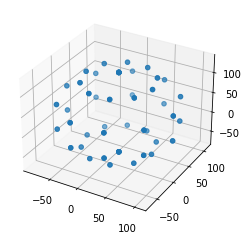

In [15]:
a,b,c = 10,20,30
r = 100
#resolution = 2
PHI = np.arange(0.0, 2*np.pi, np.pi/5)
ETA = np.arange(0.0, 2*np.pi, np.pi*1/5)

ETA, PHI = np.repeat(ETA, PHI.shape[0]), np.tile(PHI, ETA.shape[0])

XX = a + r * np.sin(ETA) * np.cos(PHI)
YY = b + r * np.sin(ETA) * np.sin(PHI)
ZZ = c + r * np.cos(ETA)

voxelGrid = np.vstack((XX,YY,ZZ))
#voxelGrid = np.ceil(resolution * voxelGrid)

# plot it if you want
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(*voxelGrid)
fig.show()

In [52]:
voxelGrid.T

array([[ 10.        ,  20.        , 130.        ],
       [ 10.        ,  20.        , 130.        ],
       [ 10.        ,  20.        , 130.        ],
       ...,
       [  6.8728643 ,  20.29560136, 129.95065604],
       [  6.86512229,  20.19722979, 129.95065604],
       [  6.86047402,  20.09866358, 129.95065604]])

# Extract tissue from normal lung

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import nibabel as nib

In [4]:
normal_volume_path = r'A:\MSc\Pulmonary Nodules\sameslicethickness\normal_volumes\volumes'
normal_mask_path = r'A:\MSc\Pulmonary Nodules\sameslicethickness\normal_volumes\masks'

In [5]:
normal_vols = os.listdir(normal_volume_path)
normal_masks = os.listdir(normal_mask_path)

## Helper functions

In [6]:
def normalize_mask(mask):
    return mask/255

def normalize_volume(volume):
    return (volume-volume.min())/(volume.max()-volume.min())

def _get_slice (middle_point, length):
    start = int(middle_point - (length/2))
    end = int(middle_point + (length/2))
    return slice(start, end, None)

def _get_bbox(centroid, desired_shape = (64, 64, 28)):
    x = centroid[0]
    y = centroid[1]
    z = centroid[2]
    xlength = desired_shape[0]
    ylength = desired_shape[1]
    zlength = desired_shape[2]
    
    slx = _get_slice(x, xlength)
    sly = _get_slice(y, ylength)
    slz = _get_slice(z, zlength)
    
    return (slx, sly, slz)

def intersection_over_copped(mask, bbox):
    cropped_location = np.zeros_like(mask)
    cropped_location[bbox] = 1
    intersection = np.sum(mask * cropped_location)
    return intersection / np.sum(cropped_location)

def calc_distance(c1, c2):
    return np.sqrt( (c1[0]-c2[0])**2 + (c1[1]-c2[1])**2 + (c1[2]-c2[2])**2) 

def filter_centroids_within_volume(centroids, volume, mask, overlap_with_lung_threshold = 0.95, distance_between_centroids_threshold = 40, step = 1000):
    
    filtered_centroids = []
    for i in tqdm(range(0, len(centroids), step)):
        
        c = centroids [i]
        _bbox = _get_bbox(c)
        overlap_with_lung = intersection_over_copped(mask, _bbox)
        if overlap_with_lung < overlap_with_lung_threshold:
            continue
        
        if len(filtered_centroids) > 0:
            
            for fc in filtered_centroids:
                distance = calc_distance(c, fc)
                if distance < distance_between_centroids_threshold:
                    break          
            if distance < distance_between_centroids_threshold:
                continue
            else :
                filtered_centroids.append(c)
        
        else :
            filtered_centroids.append(c)

    return filtered_centroids

## trials on one example

In [68]:
v0 = nib.load(os.path.join(normal_volume_path, normal_vols[0])).get_fdata()
m0 = nib.load(os.path.join(normal_mask_path, normal_masks[0])).get_fdata()

v0 = normalize_volume(v0)
m0 = normalize_mask(m0)

In [69]:
ones_indices = np.array(np.where(m0 == 1)).T

In [70]:
i = 486507
m0[x[i][0], x[i][1], x[i][2]]

1.0

In [71]:
ones_indices[0]

array([113, 181,  83], dtype=int64)

In [72]:
filtered = filter_centroids_within_volume(ones_indices, v0, m0, 
                                          overlap_with_lung_threshold = 1, 
                                          distance_between_centroids_threshold = 40,
                                          step = 1000)

  0%|          | 0/4777 [00:00<?, ?it/s]

In [73]:
len(filtered)

33

## Loop over all normal volumes and save cropped volumes

In [ ]:
v_index = 0
path_to_save = r'A:\MSc\Pulmonary Nodules\sameslicethickness\normal_cropped'
for v_name, m_name in tqdm(zip(normal_vols, normal_masks), total = len(normal_masks)):
    
    vol = nib.load(os.path.join(normal_volume_path, v_name)).get_fdata()
    mask = normalize_mask(nib.load(os.path.join(normal_mask_path, m_name)).get_fdata())
    ones_indices = np.array(np.where(mask == 1)).T
    
    print(f" Filtering {len(ones_indices)} extracted centroids ")
    filtered = filter_centroids_within_volume(ones_indices, vol, mask, 
                                          overlap_with_lung_threshold = 0.95, 
                                          distance_between_centroids_threshold = 40,
                                          step = 1000)
    print(f" There are {len(ones_indices) - len(filtered)} filtered out volumes ")
    
    print(f" Saving {len(filtered)} volumes using filtered centroids ")
    for c in tqdm(filtered, total=len(filtered)):
        bbox =  _get_bbox(c, desired_shape = (64, 64, 28))
        cropped = vol[bbox].copy()
        np.save(os.path.join(path_to_save, f'v{v_index}'), cropped)
        v_index += 1

  0%|          | 0/80 [00:00<?, ?it/s]

 Filtering 4776928 extracted centroids 


  0%|          | 0/4777 [00:00<?, ?it/s]

 There are 4776895 filtered out volumes 
 Saving 33 volumes using filtered centroids 


  0%|          | 0/33 [00:00<?, ?it/s]

 Filtering 275448 extracted centroids 


  0%|          | 0/276 [00:00<?, ?it/s]

 There are 275448 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 3070137 extracted centroids 


  0%|          | 0/3071 [00:00<?, ?it/s]

 There are 3070124 filtered out volumes 
 Saving 13 volumes using filtered centroids 


  0%|          | 0/13 [00:00<?, ?it/s]

 Filtering 8074392 extracted centroids 


  0%|          | 0/8075 [00:00<?, ?it/s]

C:\Users\peter\AppData\Local\Temp\ipykernel_3800\2591462932.py:30: RuntimeWarning: invalid value encountered in double_scalars
  return intersection / np.sum(cropped_location)


 There are 8074335 filtered out volumes 
 Saving 57 volumes using filtered centroids 


  0%|          | 0/57 [00:00<?, ?it/s]

 Filtering 5508 extracted centroids 


  0%|          | 0/6 [00:00<?, ?it/s]

 There are 5508 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 7855214 extracted centroids 


  0%|          | 0/7856 [00:00<?, ?it/s]

 There are 7855165 filtered out volumes 
 Saving 49 volumes using filtered centroids 


  0%|          | 0/49 [00:00<?, ?it/s]

 Filtering 282590 extracted centroids 


  0%|          | 0/283 [00:00<?, ?it/s]

 There are 282590 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 320095 extracted centroids 


  0%|          | 0/321 [00:00<?, ?it/s]

 There are 320095 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 170041 extracted centroids 


  0%|          | 0/171 [00:00<?, ?it/s]

 There are 170041 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 1862070 extracted centroids 


  0%|          | 0/1863 [00:00<?, ?it/s]

 There are 1862069 filtered out volumes 
 Saving 1 volumes using filtered centroids 


  0%|          | 0/1 [00:00<?, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 5224664 extracted centroids 


  0%|          | 0/5225 [00:00<?, ?it/s]

 There are 5224649 filtered out volumes 
 Saving 15 volumes using filtered centroids 


  0%|          | 0/15 [00:00<?, ?it/s]

 Filtering 842663 extracted centroids 


  0%|          | 0/843 [00:00<?, ?it/s]

 There are 842663 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 50750 extracted centroids 


  0%|          | 0/51 [00:00<?, ?it/s]

 There are 50750 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 62514 extracted centroids 


  0%|          | 0/63 [00:00<?, ?it/s]

 There are 62514 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 63575 extracted centroids 


  0%|          | 0/64 [00:00<?, ?it/s]

 There are 63575 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 161577 extracted centroids 


  0%|          | 0/162 [00:00<?, ?it/s]

 There are 161575 filtered out volumes 
 Saving 2 volumes using filtered centroids 


  0%|          | 0/2 [00:00<?, ?it/s]

 Filtering 9233127 extracted centroids 


  0%|          | 0/9234 [00:00<?, ?it/s]

 There are 9233053 filtered out volumes 
 Saving 74 volumes using filtered centroids 


  0%|          | 0/74 [00:00<?, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 2565850 extracted centroids 


  0%|          | 0/2566 [00:00<?, ?it/s]

 There are 2565840 filtered out volumes 
 Saving 10 volumes using filtered centroids 


  0%|          | 0/10 [00:00<?, ?it/s]

 Filtering 52789 extracted centroids 


  0%|          | 0/53 [00:00<?, ?it/s]

 There are 52789 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 3375390 extracted centroids 


  0%|          | 0/3376 [00:00<?, ?it/s]

 There are 3375373 filtered out volumes 
 Saving 17 volumes using filtered centroids 


  0%|          | 0/17 [00:00<?, ?it/s]

 Filtering 89430 extracted centroids 


  0%|          | 0/90 [00:00<?, ?it/s]

 There are 89430 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 77752 extracted centroids 


  0%|          | 0/78 [00:00<?, ?it/s]

 There are 77752 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 13306 extracted centroids 


  0%|          | 0/14 [00:00<?, ?it/s]

 There are 13306 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 810086 extracted centroids 


  0%|          | 0/811 [00:00<?, ?it/s]

 There are 810086 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 3855047 extracted centroids 


  0%|          | 0/3856 [00:00<?, ?it/s]

 There are 3855021 filtered out volumes 
 Saving 26 volumes using filtered centroids 


  0%|          | 0/26 [00:00<?, ?it/s]

 Filtering 6640 extracted centroids 


  0%|          | 0/7 [00:00<?, ?it/s]

 There are 6640 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 3656743 extracted centroids 


  0%|          | 0/3657 [00:00<?, ?it/s]

 There are 3656723 filtered out volumes 
 Saving 20 volumes using filtered centroids 


  0%|          | 0/20 [00:00<?, ?it/s]

 Filtering 3121194 extracted centroids 


  0%|          | 0/3122 [00:00<?, ?it/s]

 There are 3121180 filtered out volumes 
 Saving 14 volumes using filtered centroids 


  0%|          | 0/14 [00:00<?, ?it/s]

 Filtering 3868497 extracted centroids 


  0%|          | 0/3869 [00:00<?, ?it/s]

 There are 3868477 filtered out volumes 
 Saving 20 volumes using filtered centroids 


  0%|          | 0/20 [00:00<?, ?it/s]

 Filtering 3959483 extracted centroids 


  0%|          | 0/3960 [00:00<?, ?it/s]

 There are 3959471 filtered out volumes 
 Saving 12 volumes using filtered centroids 


  0%|          | 0/12 [00:00<?, ?it/s]

 Filtering 4604526 extracted centroids 


  0%|          | 0/4605 [00:00<?, ?it/s]

 There are 4604494 filtered out volumes 
 Saving 32 volumes using filtered centroids 


  0%|          | 0/32 [00:00<?, ?it/s]

 Filtering 1827313 extracted centroids 


  0%|          | 0/1828 [00:00<?, ?it/s]

 There are 1827309 filtered out volumes 
 Saving 4 volumes using filtered centroids 


  0%|          | 0/4 [00:00<?, ?it/s]

 Filtering 279999 extracted centroids 


  0%|          | 0/280 [00:00<?, ?it/s]

 There are 279999 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 362079 extracted centroids 


  0%|          | 0/363 [00:00<?, ?it/s]

 There are 362079 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 3503042 extracted centroids 


  0%|          | 0/3504 [00:00<?, ?it/s]

 There are 3503021 filtered out volumes 
 Saving 21 volumes using filtered centroids 


  0%|          | 0/21 [00:00<?, ?it/s]

 Filtering 2296087 extracted centroids 


  0%|          | 0/2297 [00:00<?, ?it/s]

 There are 2296079 filtered out volumes 
 Saving 8 volumes using filtered centroids 


  0%|          | 0/8 [00:00<?, ?it/s]

 Filtering 13795 extracted centroids 


  0%|          | 0/14 [00:00<?, ?it/s]

 There are 13795 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 12769 extracted centroids 


  0%|          | 0/13 [00:00<?, ?it/s]

 There are 12769 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 29739 extracted centroids 


  0%|          | 0/30 [00:00<?, ?it/s]

 There are 29739 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 1666 extracted centroids 


  0%|          | 0/2 [00:00<?, ?it/s]

 There are 1666 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 2684907 extracted centroids 


  0%|          | 0/2685 [00:00<?, ?it/s]

 There are 2684900 filtered out volumes 
 Saving 7 volumes using filtered centroids 


  0%|          | 0/7 [00:00<?, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 6388504 extracted centroids 


  0%|          | 0/6389 [00:00<?, ?it/s]

 There are 6388472 filtered out volumes 
 Saving 32 volumes using filtered centroids 


  0%|          | 0/32 [00:00<?, ?it/s]

 Filtering 995272 extracted centroids 


  0%|          | 0/996 [00:00<?, ?it/s]

 There are 995269 filtered out volumes 
 Saving 3 volumes using filtered centroids 


  0%|          | 0/3 [00:00<?, ?it/s]

 Filtering 129276 extracted centroids 


  0%|          | 0/130 [00:00<?, ?it/s]

 There are 129276 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 7542 extracted centroids 


  0%|          | 0/8 [00:00<?, ?it/s]

 There are 7542 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 12635 extracted centroids 


  0%|          | 0/13 [00:00<?, ?it/s]

 There are 12635 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 1846373 extracted centroids 


  0%|          | 0/1847 [00:00<?, ?it/s]

 There are 1846366 filtered out volumes 
 Saving 7 volumes using filtered centroids 


  0%|          | 0/7 [00:00<?, ?it/s]

 Filtering 79060 extracted centroids 


  0%|          | 0/80 [00:00<?, ?it/s]

 There are 79060 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 535878 extracted centroids 


  0%|          | 0/536 [00:00<?, ?it/s]

 There are 535878 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 46253 extracted centroids 


  0%|          | 0/47 [00:00<?, ?it/s]

 There are 46253 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 1937889 extracted centroids 


  0%|          | 0/1938 [00:00<?, ?it/s]

 There are 1937888 filtered out volumes 
 Saving 1 volumes using filtered centroids 


  0%|          | 0/1 [00:00<?, ?it/s]

 Filtering 97664 extracted centroids 


  0%|          | 0/98 [00:00<?, ?it/s]

 There are 97664 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 24280 extracted centroids 


  0%|          | 0/25 [00:00<?, ?it/s]

 There are 24280 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 349737 extracted centroids 


  0%|          | 0/350 [00:00<?, ?it/s]

 There are 349737 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 15141 extracted centroids 


  0%|          | 0/16 [00:00<?, ?it/s]

 There are 15141 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 5585323 extracted centroids 


  0%|          | 0/5586 [00:00<?, ?it/s]

 There are 5585293 filtered out volumes 
 Saving 30 volumes using filtered centroids 


  0%|          | 0/30 [00:00<?, ?it/s]

 Filtering 1108852 extracted centroids 


  0%|          | 0/1109 [00:00<?, ?it/s]

 There are 1108852 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 6570317 extracted centroids 


  0%|          | 0/6571 [00:00<?, ?it/s]

 There are 6570277 filtered out volumes 
 Saving 40 volumes using filtered centroids 


  0%|          | 0/40 [00:00<?, ?it/s]

 Filtering 4612594 extracted centroids 


  0%|          | 0/4613 [00:00<?, ?it/s]

 There are 4612568 filtered out volumes 
 Saving 26 volumes using filtered centroids 


  0%|          | 0/26 [00:00<?, ?it/s]

 Filtering 186083 extracted centroids 


  0%|          | 0/187 [00:00<?, ?it/s]

 There are 186083 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 123947 extracted centroids 


  0%|          | 0/124 [00:00<?, ?it/s]

 There are 123947 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 3630381 extracted centroids 


  0%|          | 0/3631 [00:00<?, ?it/s]

 There are 3630371 filtered out volumes 
 Saving 10 volumes using filtered centroids 


  0%|          | 0/10 [00:00<?, ?it/s]

 Filtering 419585 extracted centroids 


  0%|          | 0/420 [00:00<?, ?it/s]

 There are 419584 filtered out volumes 
 Saving 1 volumes using filtered centroids 


  0%|          | 0/1 [00:00<?, ?it/s]

 Filtering 1223633 extracted centroids 


  0%|          | 0/1224 [00:00<?, ?it/s]

In [7]:
v_index = 0
path_to_save = r'A:\MSc\Pulmonary Nodules\sameslicethickness\normal_cropped_lower_quality'
for v_name, m_name in tqdm(zip(normal_vols, normal_masks), total = len(normal_masks)):
    
    vol = nib.load(os.path.join(normal_volume_path, v_name)).get_fdata()
    mask = normalize_mask(nib.load(os.path.join(normal_mask_path, m_name)).get_fdata())
    ones_indices = np.array(np.where(mask == 1)).T
    
    print(f" Filtering {len(ones_indices)} extracted centroids ")
    filtered = filter_centroids_within_volume(ones_indices, vol, mask, 
                                          overlap_with_lung_threshold = 0.85, 
                                          distance_between_centroids_threshold = 30,
                                          step = 500)
    print(f" There are {len(ones_indices) - len(filtered)} filtered out volumes ")
    
    print(f" Saving {len(filtered)} volumes using filtered centroids ")
    for c in tqdm(filtered, total=len(filtered)):
        bbox =  _get_bbox(c, desired_shape = (64, 64, 28))
        cropped = vol[bbox].copy()
        np.save(os.path.join(path_to_save, f'v{v_index}'), cropped)
        v_index += 1

  0%|          | 0/80 [00:00<?, ?it/s]

 Filtering 4776928 extracted centroids 


  0%|          | 0/9554 [00:00<?, ?it/s]

 There are 4776833 filtered out volumes 
 Saving 95 volumes using filtered centroids 


  0%|          | 0/95 [00:00<?, ?it/s]

 Filtering 275448 extracted centroids 


  0%|          | 0/551 [00:00<?, ?it/s]

 There are 275448 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 3070137 extracted centroids 


  0%|          | 0/6141 [00:00<?, ?it/s]

 There are 3070094 filtered out volumes 
 Saving 43 volumes using filtered centroids 


  0%|          | 0/43 [00:00<?, ?it/s]

 Filtering 8074392 extracted centroids 


  0%|          | 0/16149 [00:00<?, ?it/s]

C:\Users\peter\AppData\Local\Temp\ipykernel_11780\2591462932.py:30: RuntimeWarning: invalid value encountered in double_scalars
  return intersection / np.sum(cropped_location)


 There are 8074235 filtered out volumes 
 Saving 157 volumes using filtered centroids 


  0%|          | 0/157 [00:00<?, ?it/s]

 Filtering 5508 extracted centroids 


  0%|          | 0/12 [00:00<?, ?it/s]

 There are 5508 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 7855214 extracted centroids 


  0%|          | 0/15711 [00:00<?, ?it/s]

 There are 7855070 filtered out volumes 
 Saving 144 volumes using filtered centroids 


  0%|          | 0/144 [00:00<?, ?it/s]

 Filtering 282590 extracted centroids 


  0%|          | 0/566 [00:00<?, ?it/s]

 There are 282590 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 320095 extracted centroids 


  0%|          | 0/641 [00:00<?, ?it/s]

 There are 320095 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 170041 extracted centroids 


  0%|          | 0/341 [00:00<?, ?it/s]

 There are 170041 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 1862070 extracted centroids 


  0%|          | 0/3725 [00:00<?, ?it/s]

 There are 1862066 filtered out volumes 
 Saving 4 volumes using filtered centroids 


  0%|          | 0/4 [00:00<?, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 5224664 extracted centroids 


  0%|          | 0/10450 [00:00<?, ?it/s]

 There are 5224595 filtered out volumes 
 Saving 69 volumes using filtered centroids 


  0%|          | 0/69 [00:00<?, ?it/s]

 Filtering 842663 extracted centroids 


  0%|          | 0/1686 [00:00<?, ?it/s]

 There are 842663 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 50750 extracted centroids 


  0%|          | 0/102 [00:00<?, ?it/s]

 There are 50750 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 62514 extracted centroids 


  0%|          | 0/126 [00:00<?, ?it/s]

 There are 62514 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 63575 extracted centroids 


  0%|          | 0/128 [00:00<?, ?it/s]

 There are 63575 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 161577 extracted centroids 


  0%|          | 0/324 [00:00<?, ?it/s]

 There are 161575 filtered out volumes 
 Saving 2 volumes using filtered centroids 


  0%|          | 0/2 [00:00<?, ?it/s]

 Filtering 9233127 extracted centroids 


  0%|          | 0/18467 [00:00<?, ?it/s]

 There are 9232937 filtered out volumes 
 Saving 190 volumes using filtered centroids 


  0%|          | 0/190 [00:00<?, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 2565850 extracted centroids 


  0%|          | 0/5132 [00:00<?, ?it/s]

 There are 2565815 filtered out volumes 
 Saving 35 volumes using filtered centroids 


  0%|          | 0/35 [00:00<?, ?it/s]

 Filtering 52789 extracted centroids 


  0%|          | 0/106 [00:00<?, ?it/s]

 There are 52789 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 3375390 extracted centroids 


  0%|          | 0/6751 [00:00<?, ?it/s]

 There are 3375337 filtered out volumes 
 Saving 53 volumes using filtered centroids 


  0%|          | 0/53 [00:00<?, ?it/s]

 Filtering 89430 extracted centroids 


  0%|          | 0/179 [00:00<?, ?it/s]

 There are 89430 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 77752 extracted centroids 


  0%|          | 0/156 [00:00<?, ?it/s]

 There are 77752 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 13306 extracted centroids 


  0%|          | 0/27 [00:00<?, ?it/s]

 There are 13306 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 810086 extracted centroids 


  0%|          | 0/1621 [00:00<?, ?it/s]

 There are 810086 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 3855047 extracted centroids 


  0%|          | 0/7711 [00:00<?, ?it/s]

 There are 3854973 filtered out volumes 
 Saving 74 volumes using filtered centroids 


  0%|          | 0/74 [00:00<?, ?it/s]

 Filtering 6640 extracted centroids 


  0%|          | 0/14 [00:00<?, ?it/s]

 There are 6640 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 3656743 extracted centroids 


  0%|          | 0/7314 [00:00<?, ?it/s]

 There are 3656682 filtered out volumes 
 Saving 61 volumes using filtered centroids 


  0%|          | 0/61 [00:00<?, ?it/s]

 Filtering 3121194 extracted centroids 


  0%|          | 0/6243 [00:00<?, ?it/s]

 There are 3121144 filtered out volumes 
 Saving 50 volumes using filtered centroids 


  0%|          | 0/50 [00:00<?, ?it/s]

 Filtering 3868497 extracted centroids 


  0%|          | 0/7737 [00:00<?, ?it/s]

 There are 3868430 filtered out volumes 
 Saving 67 volumes using filtered centroids 


  0%|          | 0/67 [00:00<?, ?it/s]

 Filtering 3959483 extracted centroids 


  0%|          | 0/7919 [00:00<?, ?it/s]

 There are 3959424 filtered out volumes 
 Saving 59 volumes using filtered centroids 


  0%|          | 0/59 [00:00<?, ?it/s]

 Filtering 4604526 extracted centroids 


  0%|          | 0/9210 [00:00<?, ?it/s]

 There are 4604438 filtered out volumes 
 Saving 88 volumes using filtered centroids 


  0%|          | 0/88 [00:00<?, ?it/s]

 Filtering 1827313 extracted centroids 


  0%|          | 0/3655 [00:00<?, ?it/s]

 There are 1827299 filtered out volumes 
 Saving 14 volumes using filtered centroids 


  0%|          | 0/14 [00:00<?, ?it/s]

 Filtering 279999 extracted centroids 


  0%|          | 0/560 [00:00<?, ?it/s]

 There are 279999 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 362079 extracted centroids 


  0%|          | 0/725 [00:00<?, ?it/s]

 There are 362079 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 3503042 extracted centroids 


  0%|          | 0/7007 [00:00<?, ?it/s]

 There are 3502982 filtered out volumes 
 Saving 60 volumes using filtered centroids 


  0%|          | 0/60 [00:00<?, ?it/s]

 Filtering 2296087 extracted centroids 


  0%|          | 0/4593 [00:00<?, ?it/s]

 There are 2296061 filtered out volumes 
 Saving 26 volumes using filtered centroids 


  0%|          | 0/26 [00:00<?, ?it/s]

 Filtering 13795 extracted centroids 


  0%|          | 0/28 [00:00<?, ?it/s]

 There are 13795 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 12769 extracted centroids 


  0%|          | 0/26 [00:00<?, ?it/s]

 There are 12769 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 29739 extracted centroids 


  0%|          | 0/60 [00:00<?, ?it/s]

 There are 29739 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 1666 extracted centroids 


  0%|          | 0/4 [00:00<?, ?it/s]

 There are 1666 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 2684907 extracted centroids 


  0%|          | 0/5370 [00:00<?, ?it/s]

 There are 2684880 filtered out volumes 
 Saving 27 volumes using filtered centroids 


  0%|          | 0/27 [00:00<?, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 6388504 extracted centroids 


  0%|          | 0/12778 [00:00<?, ?it/s]

 There are 6388395 filtered out volumes 
 Saving 109 volumes using filtered centroids 


  0%|          | 0/109 [00:00<?, ?it/s]

 Filtering 995272 extracted centroids 


  0%|          | 0/1991 [00:00<?, ?it/s]

 There are 995267 filtered out volumes 
 Saving 5 volumes using filtered centroids 


  0%|          | 0/5 [00:00<?, ?it/s]

 Filtering 129276 extracted centroids 


  0%|          | 0/259 [00:00<?, ?it/s]

 There are 129276 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 7542 extracted centroids 


  0%|          | 0/16 [00:00<?, ?it/s]

 There are 7542 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 12635 extracted centroids 


  0%|          | 0/26 [00:00<?, ?it/s]

 There are 12635 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 1846373 extracted centroids 


  0%|          | 0/3693 [00:00<?, ?it/s]

 There are 1846349 filtered out volumes 
 Saving 24 volumes using filtered centroids 


  0%|          | 0/24 [00:00<?, ?it/s]

 Filtering 79060 extracted centroids 


  0%|          | 0/159 [00:00<?, ?it/s]

 There are 79060 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 535878 extracted centroids 


  0%|          | 0/1072 [00:00<?, ?it/s]

 There are 535878 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 46253 extracted centroids 


  0%|          | 0/93 [00:00<?, ?it/s]

 There are 46253 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 1937889 extracted centroids 


  0%|          | 0/3876 [00:00<?, ?it/s]

 There are 1937887 filtered out volumes 
 Saving 2 volumes using filtered centroids 


  0%|          | 0/2 [00:00<?, ?it/s]

 Filtering 97664 extracted centroids 


  0%|          | 0/196 [00:00<?, ?it/s]

 There are 97664 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 24280 extracted centroids 


  0%|          | 0/49 [00:00<?, ?it/s]

 There are 24280 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 349737 extracted centroids 


  0%|          | 0/700 [00:00<?, ?it/s]

 There are 349737 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 15141 extracted centroids 


  0%|          | 0/31 [00:00<?, ?it/s]

 There are 15141 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 5585323 extracted centroids 


  0%|          | 0/11171 [00:00<?, ?it/s]

 There are 5585234 filtered out volumes 
 Saving 89 volumes using filtered centroids 


  0%|          | 0/89 [00:00<?, ?it/s]

 Filtering 1108852 extracted centroids 


  0%|          | 0/2218 [00:00<?, ?it/s]

 There are 1108852 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 6570317 extracted centroids 


  0%|          | 0/13141 [00:00<?, ?it/s]

 There are 6570203 filtered out volumes 
 Saving 114 volumes using filtered centroids 


  0%|          | 0/114 [00:00<?, ?it/s]

 Filtering 4612594 extracted centroids 


  0%|          | 0/9226 [00:00<?, ?it/s]

 There are 4612510 filtered out volumes 
 Saving 84 volumes using filtered centroids 


  0%|          | 0/84 [00:00<?, ?it/s]

 Filtering 186083 extracted centroids 


  0%|          | 0/373 [00:00<?, ?it/s]

 There are 186083 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 123947 extracted centroids 


  0%|          | 0/248 [00:00<?, ?it/s]

 There are 123947 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 3630381 extracted centroids 


  0%|          | 0/7261 [00:00<?, ?it/s]

 There are 3630345 filtered out volumes 
 Saving 36 volumes using filtered centroids 


  0%|          | 0/36 [00:00<?, ?it/s]

 Filtering 419585 extracted centroids 


  0%|          | 0/840 [00:00<?, ?it/s]

 There are 419583 filtered out volumes 
 Saving 2 volumes using filtered centroids 


  0%|          | 0/2 [00:00<?, ?it/s]

 Filtering 1223633 extracted centroids 


  0%|          | 0/2448 [00:00<?, ?it/s]

 There are 1223631 filtered out volumes 
 Saving 2 volumes using filtered centroids 


  0%|          | 0/2 [00:00<?, ?it/s]

 Filtering 0 extracted centroids 


0it [00:00, ?it/s]

 There are 0 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 37246 extracted centroids 


  0%|          | 0/75 [00:00<?, ?it/s]

 There are 37246 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]

 Filtering 47083 extracted centroids 


  0%|          | 0/95 [00:00<?, ?it/s]

 There are 47083 filtered out volumes 
 Saving 0 volumes using filtered centroids 


0it [00:00, ?it/s]